In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(647, 593, 3)


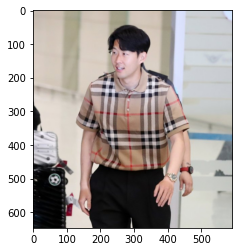

In [2]:
# 이미지 로드 및 확인
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/son.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# 모델 다운로드
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7d731f07d2b0>)

In [4]:
# 모델 로드
model = semantic_segmentation() 
model.load_pascalvoc_model(model_file)

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

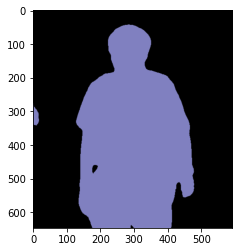

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [10]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15]

array([192, 128, 128])

(647, 593)


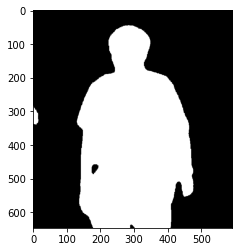

In [12]:
seg_color = (128,128,192)

seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

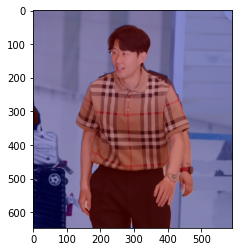

In [13]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

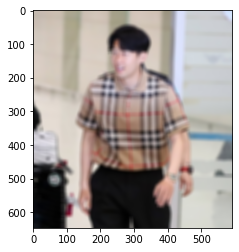

In [14]:
# 흐리게 만들기
img_orig_blur = cv2.blur(img_orig, (13,13))
  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

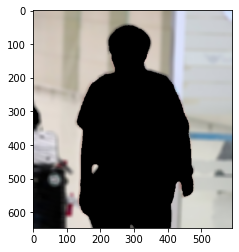

In [15]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

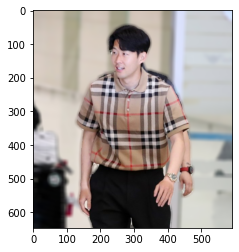

In [16]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(628, 1000, 3)


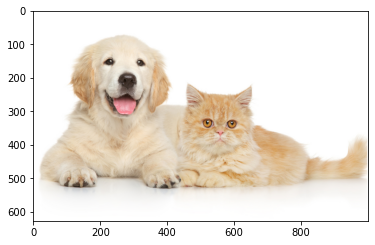

In [116]:
# 고양이 segmentation
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat_dog.png'  
img_cat = cv2.imread(img_path) 

print(img_cat.shape)

plt.imshow(cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB))
plt.show()

In [117]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [118]:
colormap[8] # 고양이 칼러맵

array([64,  0,  0])

In [119]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
dog


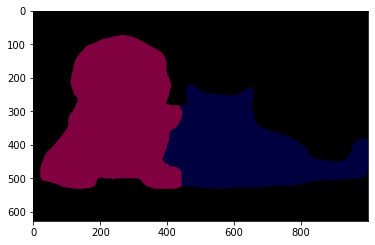

In [120]:
plt.imshow(output)
plt.show()

In [121]:
seg_color = (0,0,64) 

(628, 1000)


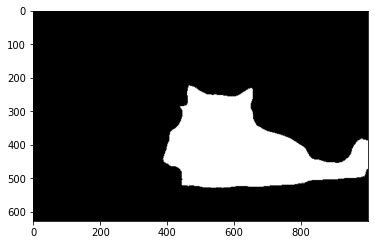

In [122]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

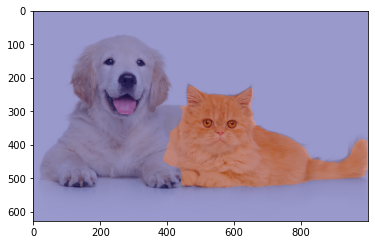

In [123]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_cat.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

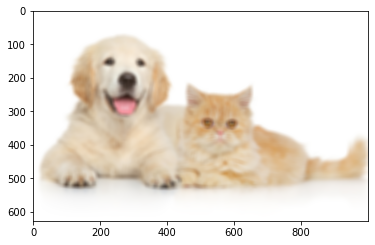

In [124]:
img_cat_blur = cv2.blur(img_cat, (13,13))
  
plt.imshow(cv2.cvtColor(img_cat_blur, cv2.COLOR_BGR2RGB))
plt.show()

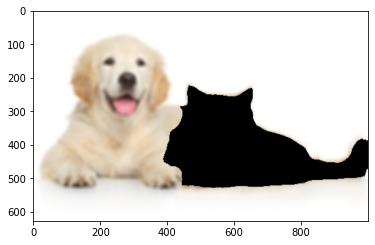

In [125]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_cat_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

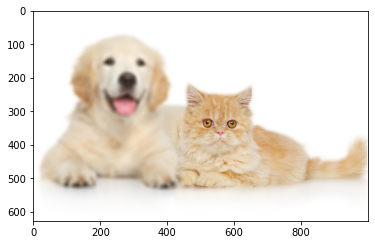

In [126]:
img_concat = np.where(img_mask_color==255, img_cat, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(420, 640, 3)


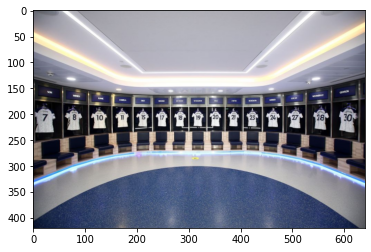

In [17]:
# 배경 바꾸기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/room.png'  
img_new_bg = cv2.imread(img_path) 

print(img_new_bg.shape)

plt.imshow(cv2.cvtColor(img_new_bg, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
# 사이즈 조정
img_orig.shape

(647, 593, 3)

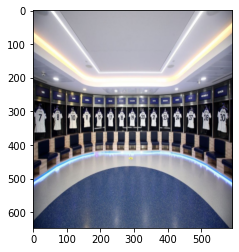

In [19]:
img_new_bg_resized = cv2.resize(img_new_bg, (img_orig.shape[1], img_orig.shape[0]))
plt.imshow(cv2.cvtColor(img_new_bg_resized, cv2.COLOR_BGR2RGB))
plt.show()

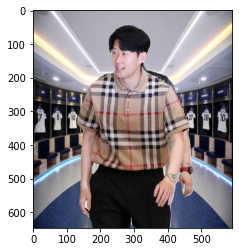

In [20]:
img_concat = np.where(img_mask_color==255, img_orig, img_new_bg_resized)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [92]:
# 모델변경
# 문제점 1. 겹쳐 있는 사람 구분 못함
# 문제점 2. segmentation이 정밀하게 이뤄지지 못함
# 문제점 3. 사람이 가지고 있는 객체를 구분 못함

# DeepLabV3 : Semantic Segmentation, 개별 객체 구분이 불가능
# Mask R-CNN : Instance Segmentation, 개별 객체 식별하고 마스크 제공

In [91]:
from pixellib.instance import instance_segmentation

model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, "mask_rcnn_coco.h5") 

segment_image = instance_segmentation()
segment_image.load_model(model_file)

Instructions for updating:
Use fn_output_signature instead


In [93]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/son.png'  
output_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/output.png'

In [94]:
segment_image.segmentImage(img_path, output_image_name = output_path)

/opt/conda/lib/python3.9/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed image saved successfully in your current working directory.


({'rois': array([[ 38, 126, 639, 474],
         [464, 463, 486, 476],
         [486, 406, 508, 426],
         [325,   0, 644, 131],
         [268,   0, 362,  27]], dtype=int32),
  'class_ids': array([ 1, 75, 75,  4,  1], dtype=int32),
  'scores': array([0.9999865 , 0.7927964 , 0.75855774, 0.74723047, 0.73552877],
        dtype=float32),
  'masks': array([[[False, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False],
          ...,
          [False, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False]],
  
         [[False, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False],
          ...,
          [False, False, False, False, False],
          [False, False, False, False, False],
          [False, False, False, False, False]],
  
         [[False, False, False, False, False],
   

(647, 593, 3)


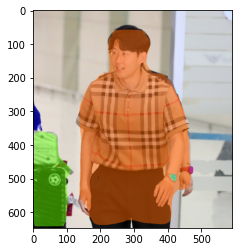

In [95]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/output.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [96]:
# 문제점 1. 겹쳐 있는 사람 구분 못함
# 문제점 2. segmentation이 정밀하게 이뤄지지 못함
# 문제점 3. 사람이 가지고 있는 객체를 구분 못함
# 문제점 3 해결.